# Q1. The GC-content of a DNA string is given by the percentage of symbols in the string that are 'C' or 'G'. For example, the GC-content of "AGCTATAG" is 37.5%. Note that the reverse complement of any DNA string has the same GC-content. Write a python function "computeGCFromFASTA()" to include below points.
# Input to this function must be a FASTA file. Use folder GC_FASTA for the input files. Compute for all the four files. All the four files contain DNA sequence.


i) Check and print the validity of the FASTA text file. If the file is invalid, clean it by removing the unwanted characters.<br>
ii) Compute and print the length of the DNA sequence.<br>
iii) Make a bar plot for the count of the Nucleotides.<br>
iv) Print the GC Content as described above.

In [137]:
# importing the modules which we are gonna use in the assignment

# importing matplotlib for visualization purpose
import matplotlib.pyplot as plt

# importing os for reading file form local computer
import os
#print(file)

# defining a list of nucleotides
nucleotides=['A','G','T','C']

In [138]:

# check if a sequence is valid or not
def isvalid(sequence):
    # accessing the nucleotides array created above
    global nucleotides
    
    # iterating for every nucleotide in the sequence
    for i in sequence:
        # uppercase of the vharacter not in nucleotides sequence is Invalid and return false
        if i.upper() not in nucleotides:
            return False
    # if requence valid return true
    return True


In [139]:
# making the sequence valid
def makevalid(string):
    # accessing the nucleotides array created above
    global nucleotides
    
    # this will store the new cleaned sequence
    valid_string=''
    
    # for every nucleotide in the sequence
    for i in range(len(string)):
        # if the uppercase of character in nucleotide then append in the final string
        if string[i].upper() in nucleotides:
            valid_string+=string[i]
            
    # returning the cleaned string
    return valid_string

In [140]:
# computing the length of the sequence
def len_of_sequence(string):
    return len(string)

In [141]:
# counting the count of different nucleotides
def count_nucleotides(string):
    
    # creating a dictionary to store the nucleotides count
    count_table=dict()
    
    # iterating for every nucleotide in the sequence
    for i in string:
        # if present in dictionary increment the count
        if i in count_table:
            count_table[i]+=1
        # otherwises set the count to 1
        else:
            count_table[i]=1
            
    # returning the dictionary
    return count_table

In [142]:
# computing the gc_content for the sequence
def gc_content(string):
    # counting the count of 'G' and 'C' in sequence
    count=0
    
    # iterating for every nucleotide in the sequence
    for i in string:
        # checking if element is 'G' or 'C'
        if i.upper()=='G' or i.upper()=='C':
            # incrementing the count
            count+=1
    
    # calculating the gc_content percentage
    ans=(count/len(string))*100
    
    # returning the gc_content values
    return ans

In [145]:
# main function which compute the Gc content from fasta and call other functions created above
def computeGCFromFASTA(path):
    # reading the file from the local computer
    with open(path,encoding='utf8') as f:
        # creating an empty string which store the sequence from txt file
        string=''
        # storing the sequence in a string 
        for i in f:
            string+=i
            
    # checking if string is valid or not
    if isvalid(string):
        print('The Given text file is valid.')
        #print(string)
        
    # if string is not valid making it valid
    else:
        print('The given text file is invalid.')
        print('\n\nMaking the file valid.......')
        print('\n\nValid file is Generated ')
        string=makevalid(string)
        #print(string)
        
    # computing the length of sequence
    sequence_length=len_of_sequence(string)
    # printing the length of sequence
    print('\n\nLength of DNA sequence is: ',sequence_length)
        
    # computing the gc content
    gc=gc_content(string)
    # printing the gc content
    print('\nGC Content for the given file is: ',gc)
    
    
    print('\nBar Plot for count of nucleotides is: ')
    # counting the count of nucleotides
    count_of_nucleotides=count_nucleotides(string)
    
    # defining the size for bar plot
    fig=plt.figure(figsize=(8,6))
    # plotting the bar chart
    plt.bar(count_of_nucleotides.keys(),count_of_nucleotides.values())
    

The given text file is invalid.


Making the file valid.......


Valid file is Generated 


Length of DNA sequence is:  859

GC Content for the given file is:  37.951105937136205

Bar Plot for count of nucleotides is: 


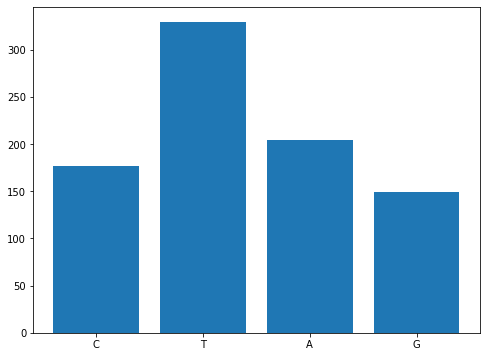

In [146]:
computeGCFromFASTA(os.path.abspath('desktop/Cancer_branneri_COI_gene.txt'))

The given text file is invalid.


Making the file valid.......


Valid file is Generated 


Length of DNA sequence is:  672

GC Content for the given file is:  63.541666666666664

Bar Plot for count of nucleotides is: 


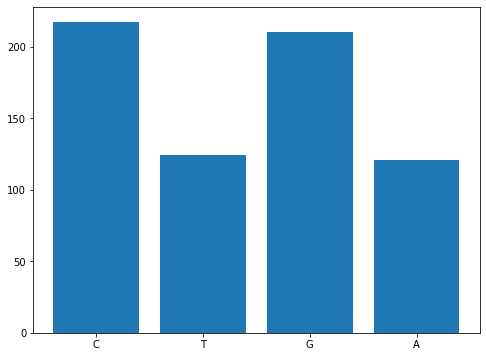

In [147]:
computeGCFromFASTA(os.path.abspath('desktop/Homo_Sapien_CRIP1.txt'))

The given text file is invalid.


Making the file valid.......


Valid file is Generated 


Length of DNA sequence is:  12565

GC Content for the given file is:  64.53641066454438

Bar Plot for count of nucleotides is: 


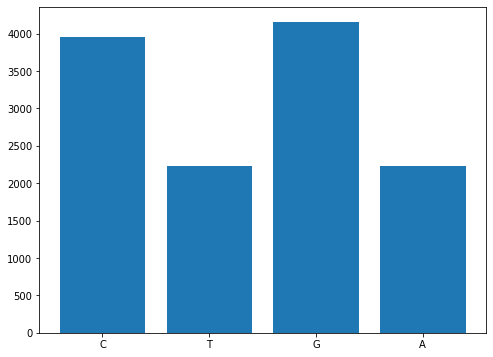

In [148]:
computeGCFromFASTA(os.path.abspath('desktop/Homo_Sapien_Insulin.txt'))

The given text file is invalid.


Making the file valid.......


Valid file is Generated 


Length of DNA sequence is:  28973

GC Content for the given file is:  38.080281641528316

Bar Plot for count of nucleotides is: 


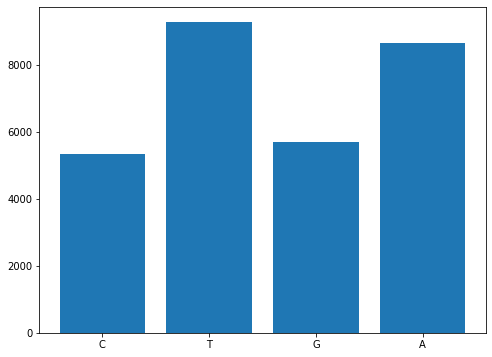

In [149]:
computeGCFromFASTA(os.path.abspath('desktop/SARS_Cov2_Surface_Glycoprotein.txt'))

# 2. For various biological processes, certain nucleotide strings appear surprisingly often in small regions of the genome. This is often because certain proteins can only bind to DNA if a specific string of nucleotides is present, and if there are more occurrences of the string, then it is more likely that binding will successfully occur. (It is also less likely that a mutation will disrupt the binding process.)

# For example, "ACTAT" is a surprisingly frequent substring of "ACAACTATGCATACTATCGGGAACTATCCT".

We use the term k-mer for a string of length k. Write a python function "PatternCount(Pattern, Text)" which takes two inputs from the user as follows:<br>
i) a k-mer as Pattern<br>
ii) and a DNA sequence as Text<br>
and outputs the number of times that the k-mer Pattern appears as a substring in Text. Following the above example,

PatternCount("ACTAT", "ACAACTATGCATACTATCGGGAACTATCCT") = 3.

Note that PatternCount("ATA", "CGATATATCCATAG") is equal to 3 (not 2) since we should account for overlapping occurrences of Pattern in Text.

In [150]:
# defining a function counting the count of k-mer pattern in the text
def PatternCount(pattern,text):
    
    # this stores the count of pattern in the text
    count=0
    
    # every element in the text
    for i in range(len(text)-len(pattern)+1):
        
        j=0
        # if length of j is less than the pattern
        while j<len(pattern):
            # if indexes at i+j in text does not matches with indexes at j in the pattern then brek this loop and move forward to next
            if text[i+j]!=pattern[j]:
                break
            j+=1
        # if j and length of pattern is equal increment the count and intialize j to 0
        if j==len(pattern):
            count+=1
            j=0
    
    # returning the count of pattern in the text
    return count

In [151]:
# calling the function
print('Count is: ',PatternCount("ACTAT", "ACAACTATGCATACTATCGGGAACTATCCT"))

Count is:  3


In [152]:
# calling the function
print('Count is: ',PatternCount("ATA", "CGATATATCCATAG"))

Count is:  3


# Q3. Use the given file "Mycobacterium_tuberculosis_49-02_complete_genome.txt" for this.
# Write a python function:

i) "translateDNAToAminoAcid()" which takes as input a FASTA text file and translates the DNA sequence string to sequence of Amino Acids using DNA Codons. Note that it is a comparatively bigger file so no need to print any of the sequences. Store the Amino Acid sequence obtained in a new file "<Your_name>_Mycobacterium_tuberculosis_protein.txt".

In [153]:
# this is a dictionary of dna_codons
dna_codons = {
    'TCA' : 'S',    # Serine
    'TCC' : 'S',    # Serine
    'TCG' : 'S',    # Serine
    'TCT' : 'S',    # Serine
    'TTC' : 'F',    # Phenylalanine
    'TTT' : 'F',    # Phenylalanine
    'TTA' : 'L',    # Leucine
    'TTG' : 'L',    # Leucine
    'TAC' : 'Y',    # Tyrosine
    'TAT' : 'Y',    # Tyrosine
    'TAA' : '_',    # Stop
    'TAG' : '_',    # Stop
    'TGC' : 'C',    # Cysteine
    'TGT' : 'C',    # Cysteine
    'TGA' : '_',    # Stop
    'TGG' : 'W',    # Tryptophan
    'CTA' : 'L',    # Leucine
    'CTC' : 'L',    # Leucine
    'CTG' : 'L',    # Leucine
    'CTT' : 'L',    # Leucine
    'CCA' : 'P',    # Proline
    'CCC' : 'P',    # Proline
    'CCG' : 'P',    # Proline
    'CCT' : 'P',    # Proline
    'CAC' : 'H',    # Histidine
    'CAT' : 'H',    # Histidine
    'CAA' : 'Q',    # Glutamine
    'CAG' : 'Q',    # Glutamine
    'CGA' : 'R',    # Arginine
    'CGC' : 'R',    # Arginine
    'CGG' : 'R',    # Arginine
    'CGT' : 'R',    # Arginine
    'ATA' : 'I',    # Isoleucine
    'ATC' : 'I',    # Isoleucine
    'ATT' : 'I',    # Isoleucine
    'ATG' : 'M',    # Methionine
    'ACA' : 'T',    # Threonine
    'ACC' : 'T',    # Threonine
    'ACG' : 'T',    # Threonine
    'ACT' : 'T',    # Threonine
    'AAC' : 'N',    # Asparagine
    'AAT' : 'N',    # Asparagine
    'AAA' : 'K',    # Lysine
    'AAG' : 'K',    # Lysine
    'AGC' : 'S',    # Serine
    'AGT' : 'S',    # Serine
    'AGA' : 'R',    # Arginine
    'AGG' : 'R',    # Arginine
    'GTA' : 'V',    # Valine
    'GTC' : 'V',    # Valine
    'GTG' : 'V',    # Valine
    'GTT' : 'V',    # Valine
    'GCA' : 'A',    # Alanine
    'GCC' : 'A',    # Alanine
    'GCG' : 'A',    # Alanine
    'GCT' : 'A',    # Alanine
    'GAC' : 'D',    # Aspartic Acid
    'GAT' : 'D',    # Aspartic Acid
    'GAA' : 'E',    # Glutamic Acid
    'GAG' : 'E',    # Glutamic Acid
    'GGA' : 'G',    # Glycine
    'GGC' : 'G',    # Glycine
    'GGG' : 'G',    # Glycine
    'GGT' : 'G',    # Glycine
    }

In [161]:
# translating the cna to amino acids using dna codon table
def translateDNAToAminoAcid(path):
    
    # reading the file from the local computer
    with open(path,encoding='utf8') as f:
        # creating an empty string which store the sequence from txt file
        string=''
        # storing the sequence in a string
        for i in f:
            string+=i
    print(len(string))
    # checking if string is valid or not
    if isvalid(string):
        print('The Given text file is valid.')
        #print(string)

    # if string is not valid making it valid
    else:
        print('The given text file is invalid.')
        print('\n\nMaking the file valid.......')
        print('\n\nValid file is Generated\n\n')
        string=makevalid(string)
        
    print(len(string))

    pos=0
    # this will store the sequence of amino acids computed from the sequence
    amino_acids=''
    
    # iterating in the sequence in a window of 3 nucleotides at a time
    for i in range(pos,len(string)-2,3):
        # concatenate the amino acids by converting throught he dna_codons
        amino_acids+=dna_codons[string[i:i+3]]

    print('Printing some amino acids from the file:-')
    print(amino_acids[:100])
    print(len(amino_acids))
    print('\n\nA text file is generated at the desired path.....')
    # storing the amino acids in a text file
    with open('Abhichal_Mycobacterium_tuberculosis_protein.txt','w') as output:
        output.write(str(amino_acids))
    
    
    

In [162]:
# calling the function
translateDNAToAminoAcid(os.path.abspath('desktop/Mycobacterium_tuberculosis_49-02_complete_genome.txt'))

4475412
The given text file is invalid.


Making the file valid.......


Valid file is Generated


4412379
Printing some amino acids from the file:-
LTDDPGSGFTTVWNAVVSELNGDPKVDDGPSSDANLSAPLTPQQRAWLNLVQPLTIVEGFALLSVPSSFVQNEIERHLRAPITDALSRRLGHQIQLGVRI
1470793


A text file is generated at the desired path.....


ii) "computeAminoAcidFreqency()" which takes as input the Amino Acid sequence obtained from above function and computes the frequency of each Amino Acid (refer to the DNA codon table given below) and outputs the most frequent Amino Acid.


In [167]:
def computeAminoAcidFrequency(path):
    # reading the file from the local computer
    with open(path,encoding='utf8') as f:
        # creating an empty string which store the sequence from txt file
        string=''
        # storing the sequence in a string
        for i in f:
            string+=i
    print(len(string))     
    # creating a dictionary which stores the count of different amino acid
    count_freq=dict()
    
    # iterating for every amino_acid in the sequence
    for i in string:
        # if element preseent in the dictionary increment it
        if i in count_freq:
            count_freq[i]+=1
        # otherwise set it to 1
        else:
            count_freq[i]=1
    
    # this will store the most occuring amino acid
    aminoacid=''
    # we will compare count with the help of this
    count=0
    print(count_freq)
    # for each amino acid
    for i in count_freq:
        # if the count is greater store it also it should not be equal to '_'
        if count_freq[i]>count and i!='_':
            count=count_freq[i]
            aminoacid=i
        
    # printing the most frequent amino acid
    print('Maximum Frequent Amino Acid is: ',aminoacid,count)

In [168]:
# calling the function
computeAminoAcidFrequency(os.path.abspath('Abhichal_Mycobacterium_tuberculosis_protein.txt'))

1470793
{'L': 86723, 'T': 86550, 'D': 54039, 'P': 137929, 'G': 134963, 'S': 126459, 'F': 24496, 'V': 86641, 'W': 30376, 'N': 25857, 'A': 168804, 'E': 35983, 'K': 19989, 'Q': 46757, 'R': 215779, 'I': 37636, 'H': 46609, 'Y': 15178, 'M': 16956, 'C': 45129, '_': 27940}
Maximum Frequent Amino Acid is:  R 215779
